In [28]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

In [29]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [30]:
cards = pd.read_csv("/home/vcalzada/Work/proyecto/modelos/creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 
scaler = StandardScaler()
x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [31]:
frac

0.018222222222222223

In [32]:
#reduccion={'pca':{'finalDim':[2,4,6]},
#           'encoder':{'capas':[[512,128]], 'finalDim':[2,4,6], 'batch_size':16, 'epochs':20 }}
reduccion={'encoder':{'capas':[[512,128]], 'finalDim':[2,4,8], 'batch_size':16, 'epochs':10 }}

In [33]:
#modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
#          'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':0.15, 'epochs':100}}
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
           'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':[0.15,0.12,0.101], 'epochs':100}}
#           'dbscan':{'eps':0.5,'min_samples':[8,14,20]}}

In [34]:
# seed
#    999
#    888

#rn.set_seed(888)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

Epoch 1/10
1719/1719 [==============================] - 31s 17ms/step - loss: 0.9413 - val_loss: 0.9194
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9164 - val_loss: 0.9108
Epoch 3/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.9097 - val_loss: 0.9072
Epoch 4/10
1719/1719 [==============================] - 30s 17ms/step - loss: 0.9063 - val_loss: 0.9049
Epoch 5/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.9040 - val_loss: 0.9030
Epoch 6/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9011 - val_loss: 0.8990
Epoch 7/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.9002 - val_loss: 0.9002
Epoch 8/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.8992 - val_loss: 0.8984
Epoch 9/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.9013 - val_loss: 0.9016
Epoch 10/10
1719/1719 [==============================] - 27s 15m

In [35]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

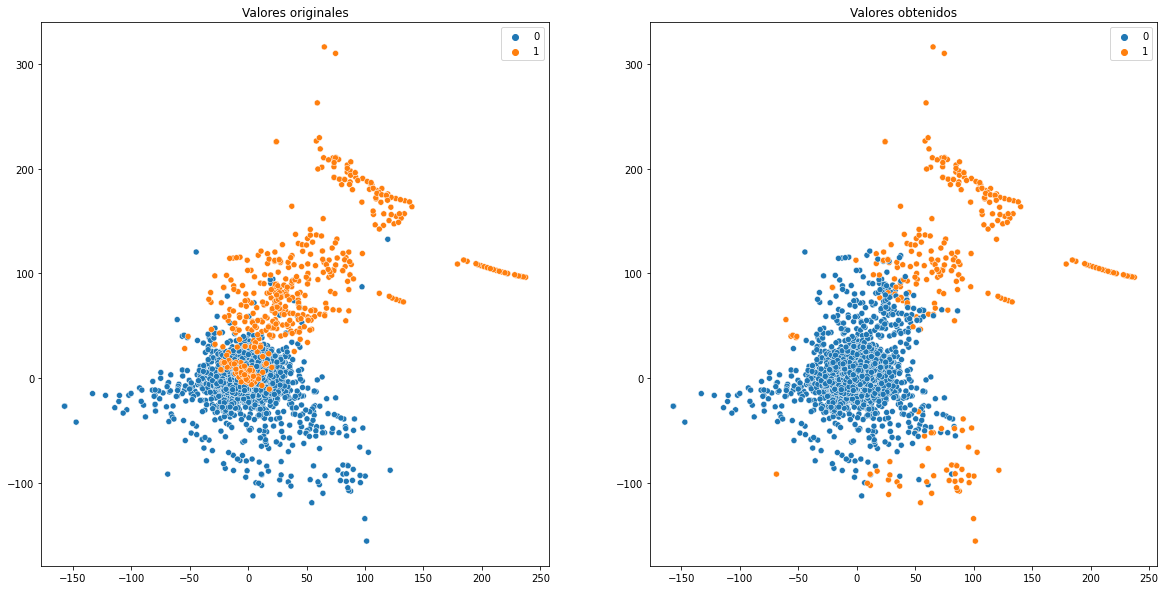

1
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

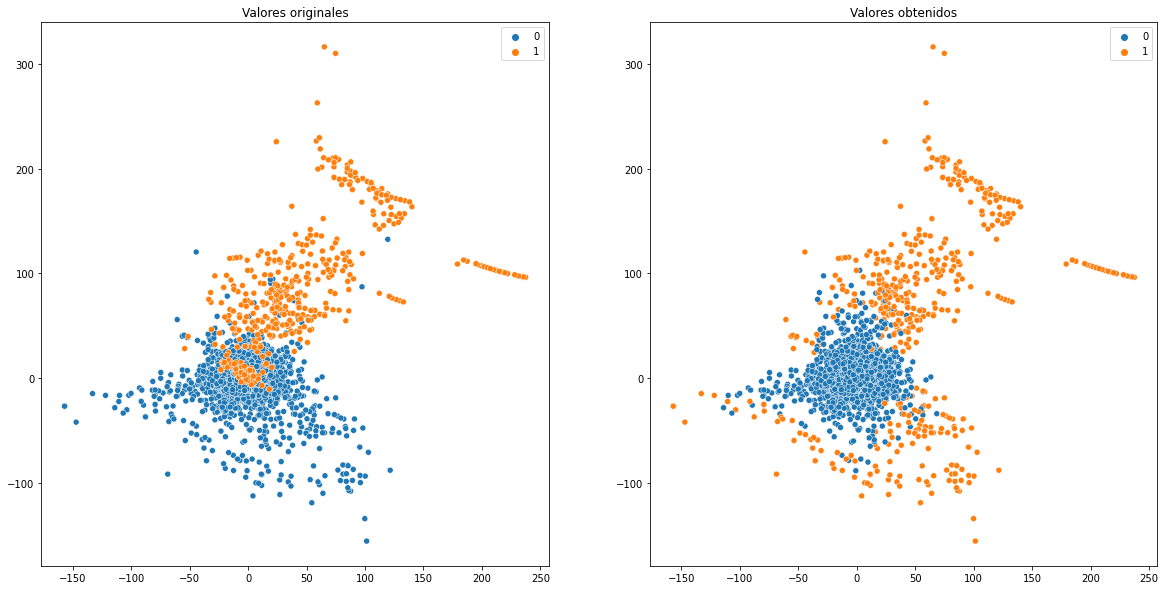

2
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

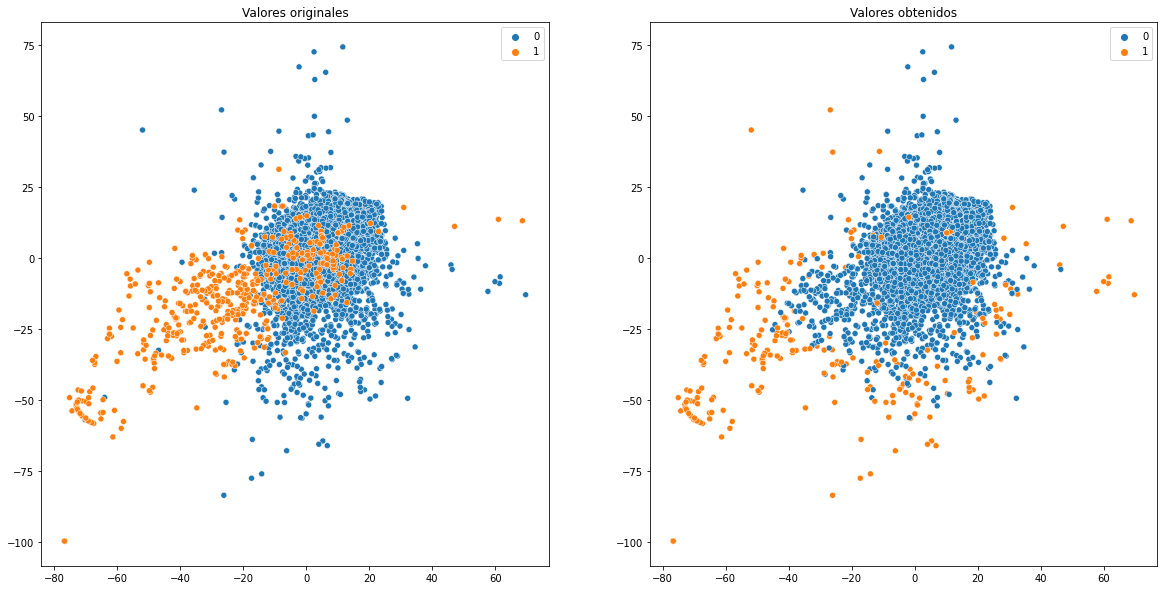

3
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non-

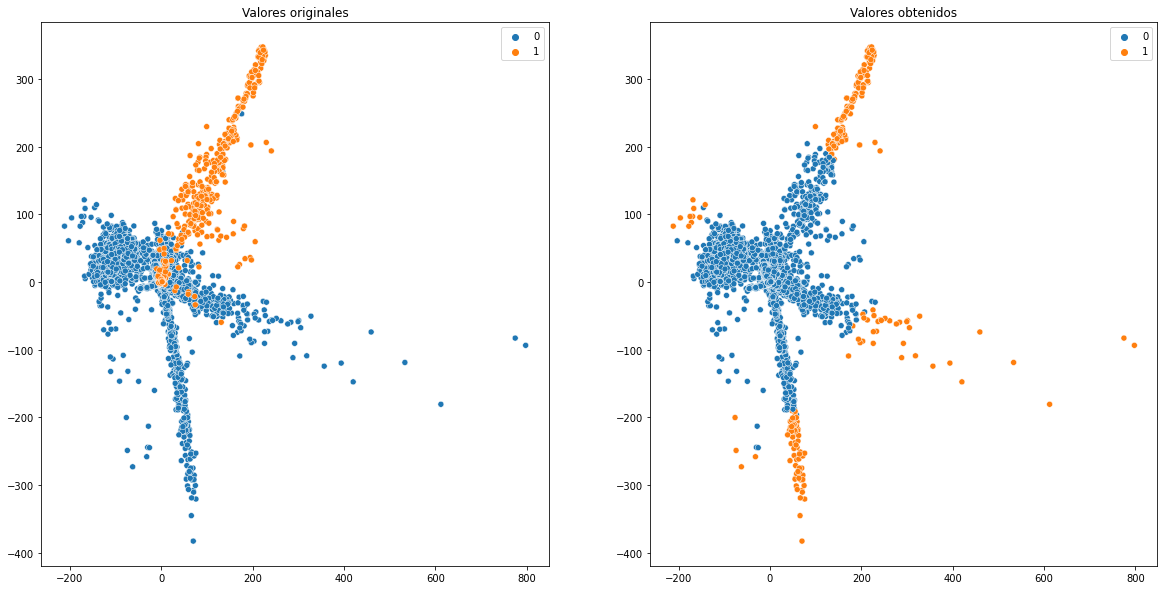

4
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non-

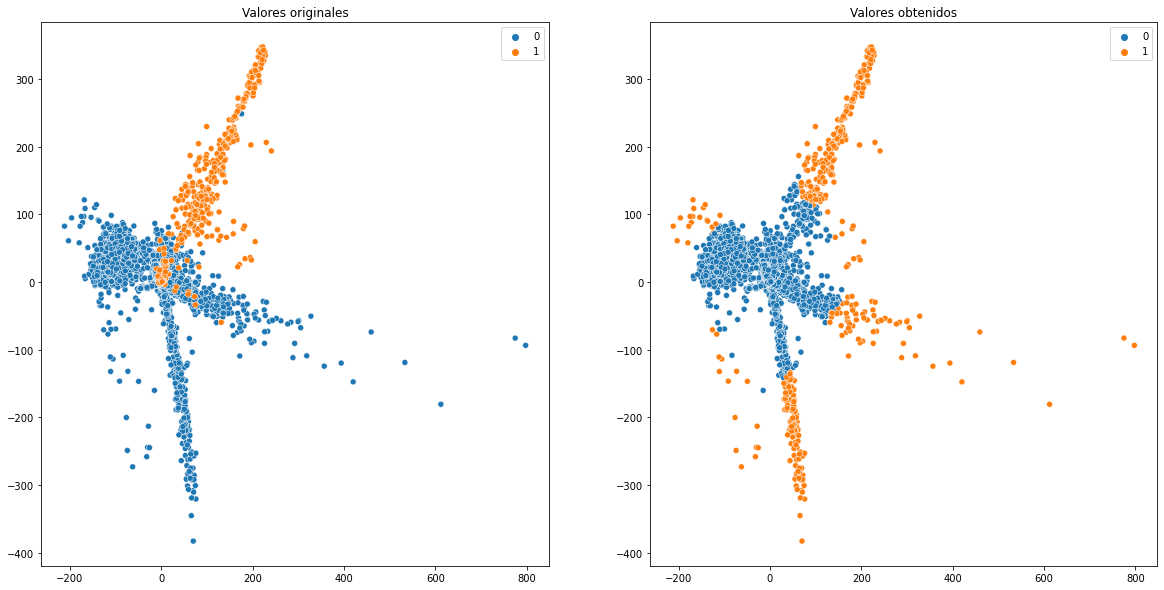

5
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

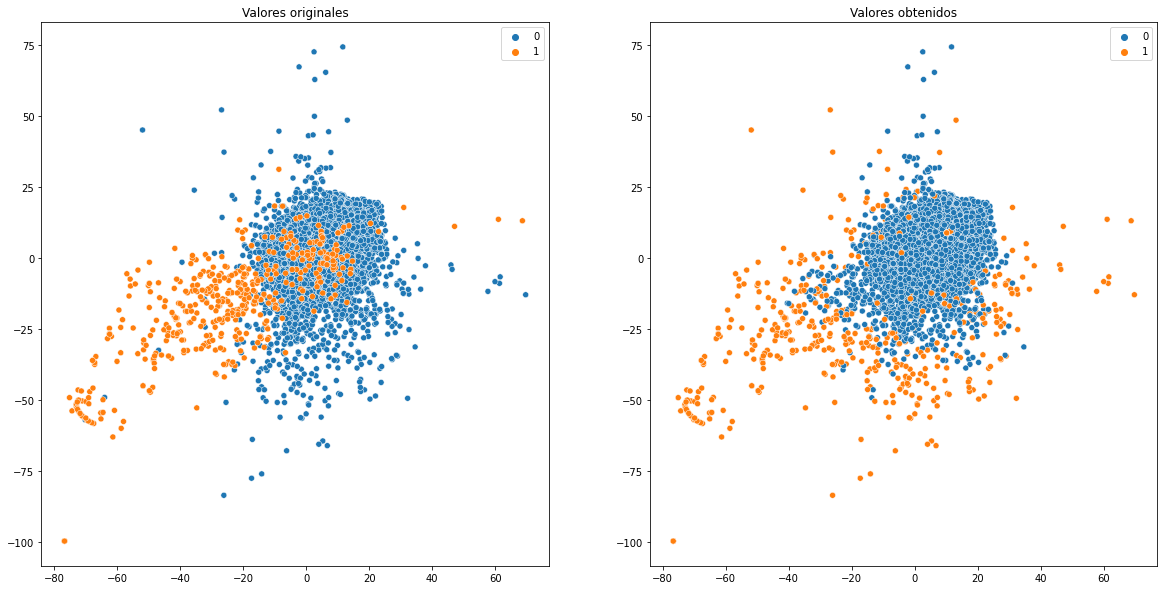

6
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

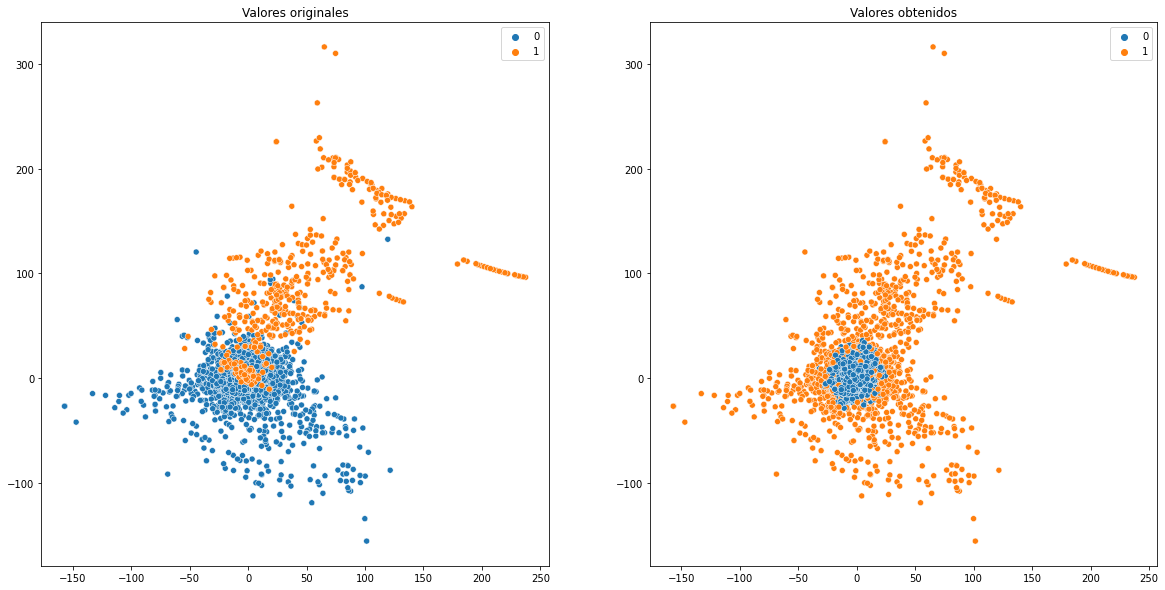

7
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non-

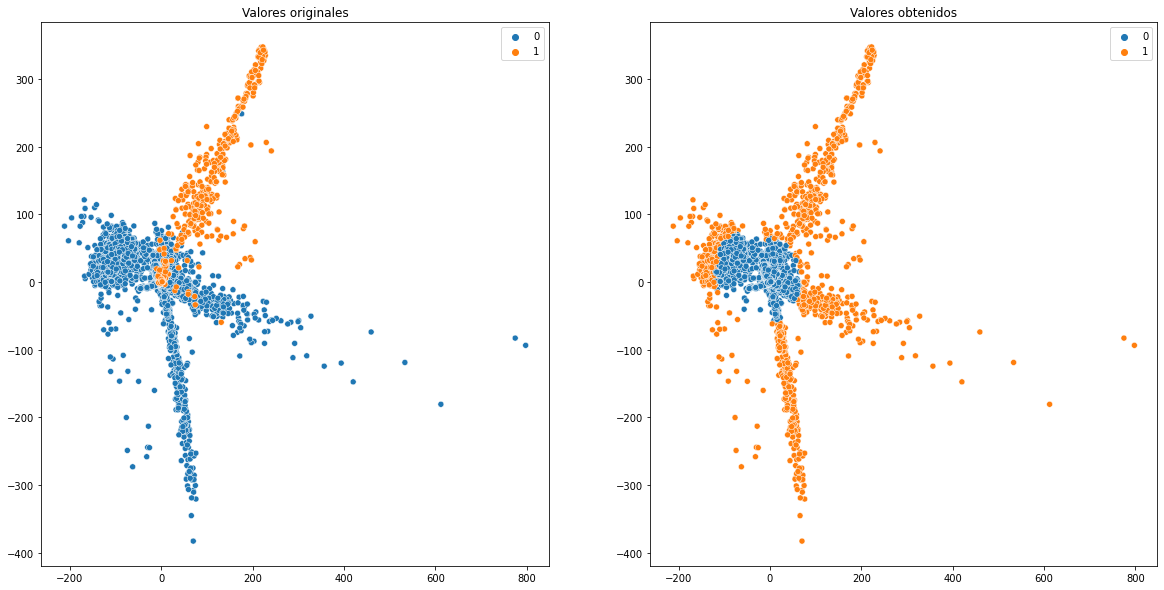

8
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non-

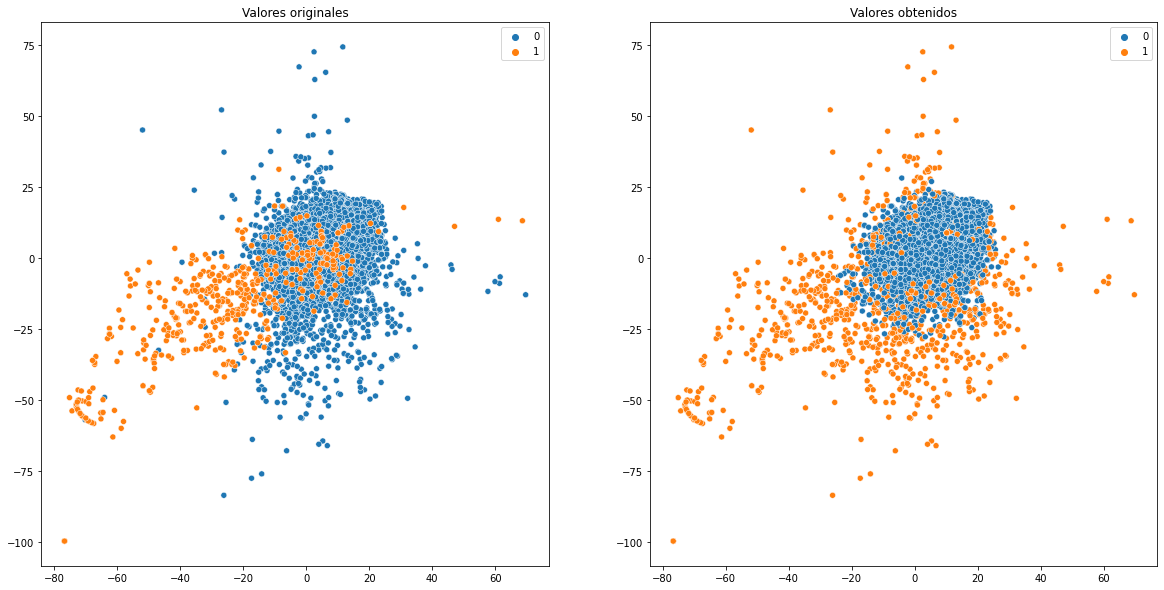

9
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-

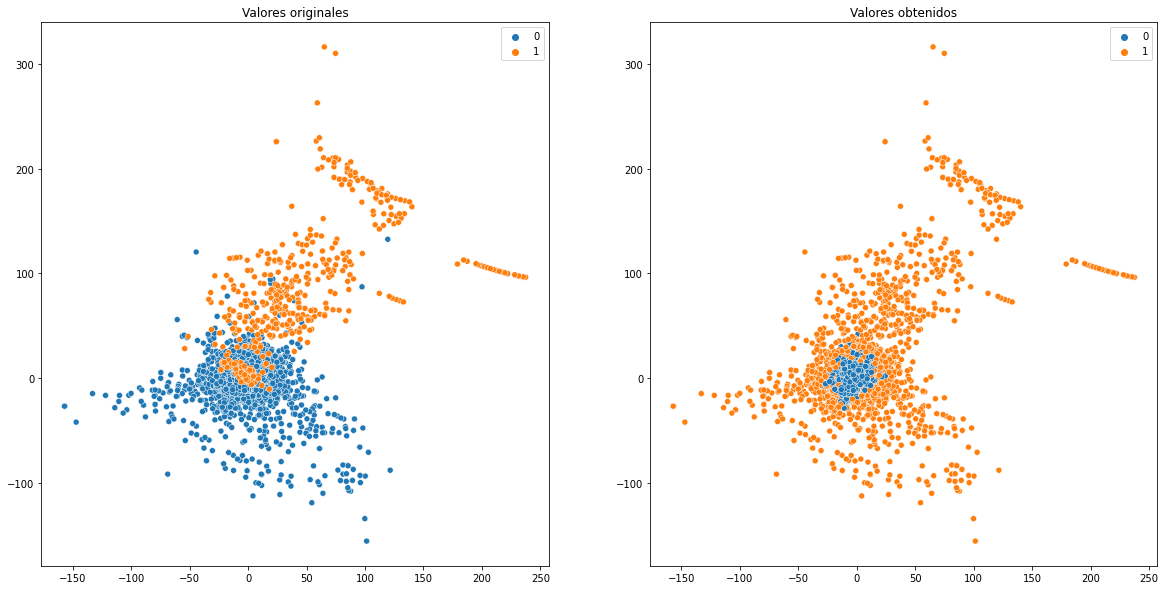

10
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

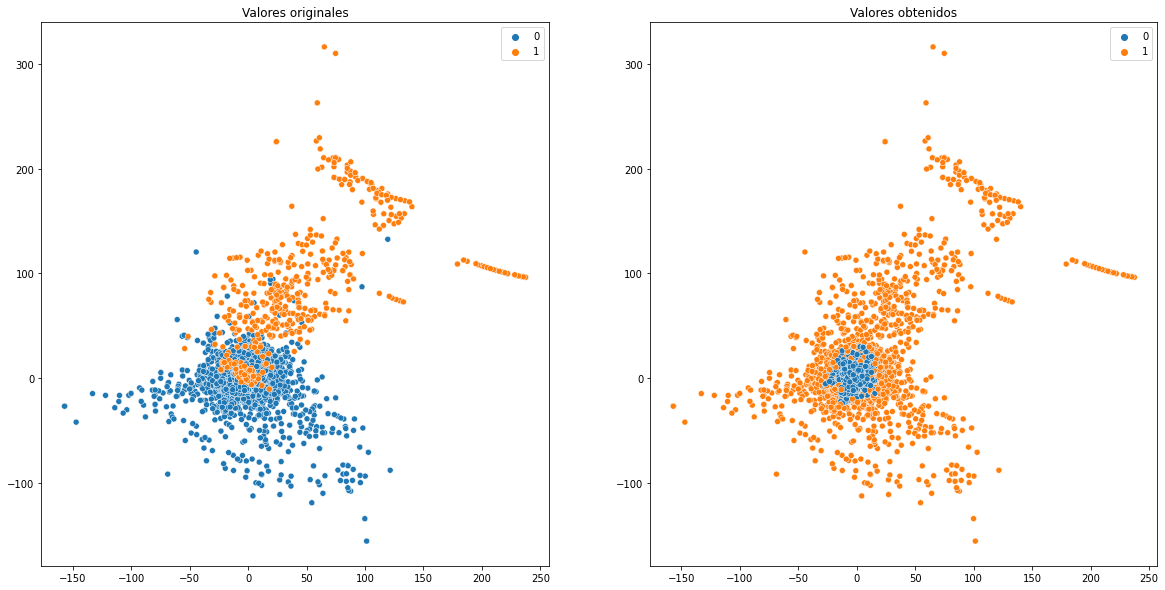

11
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

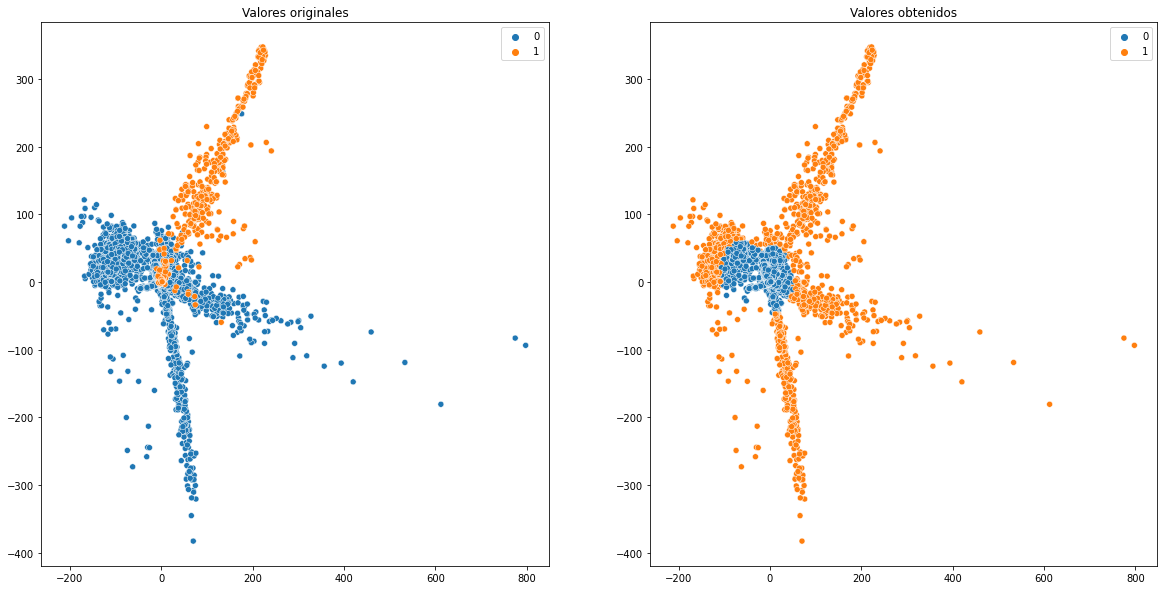

12
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non

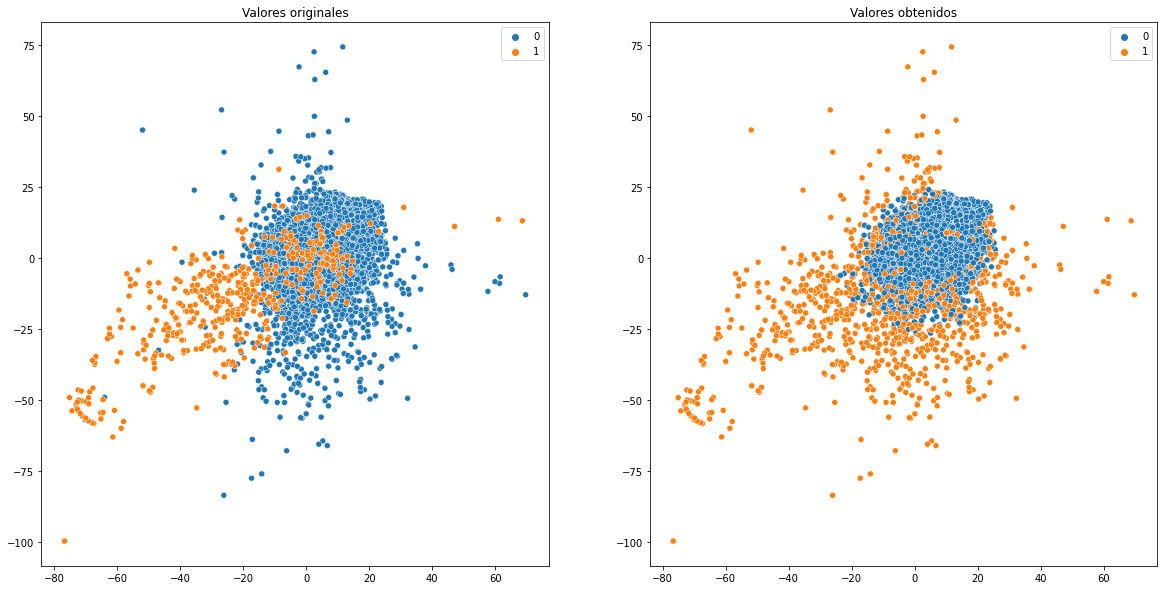

13
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non

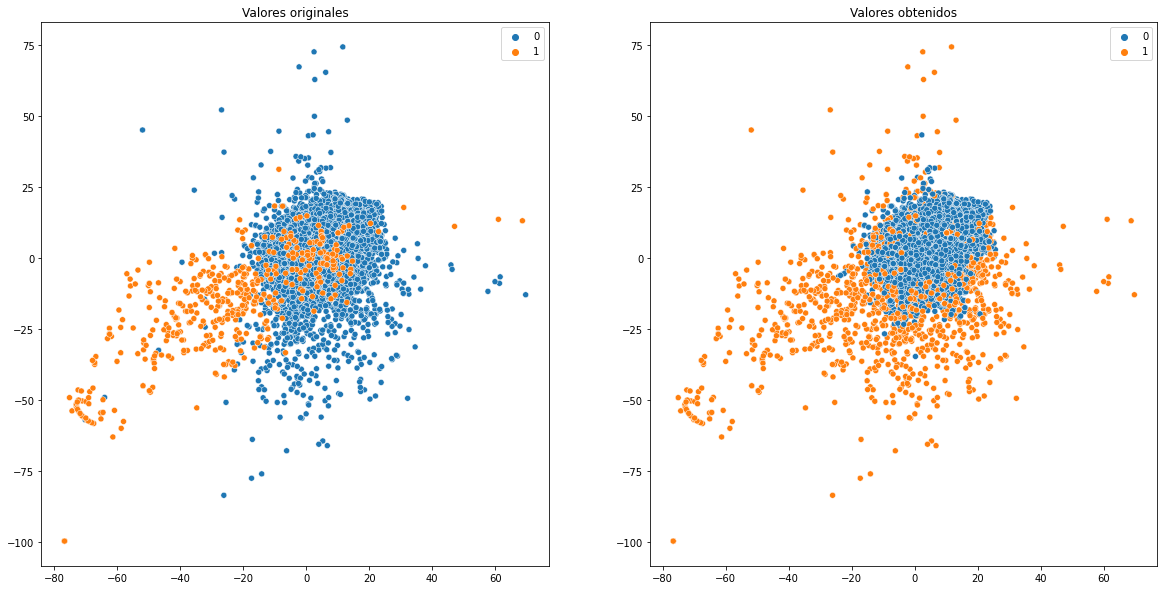

14
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

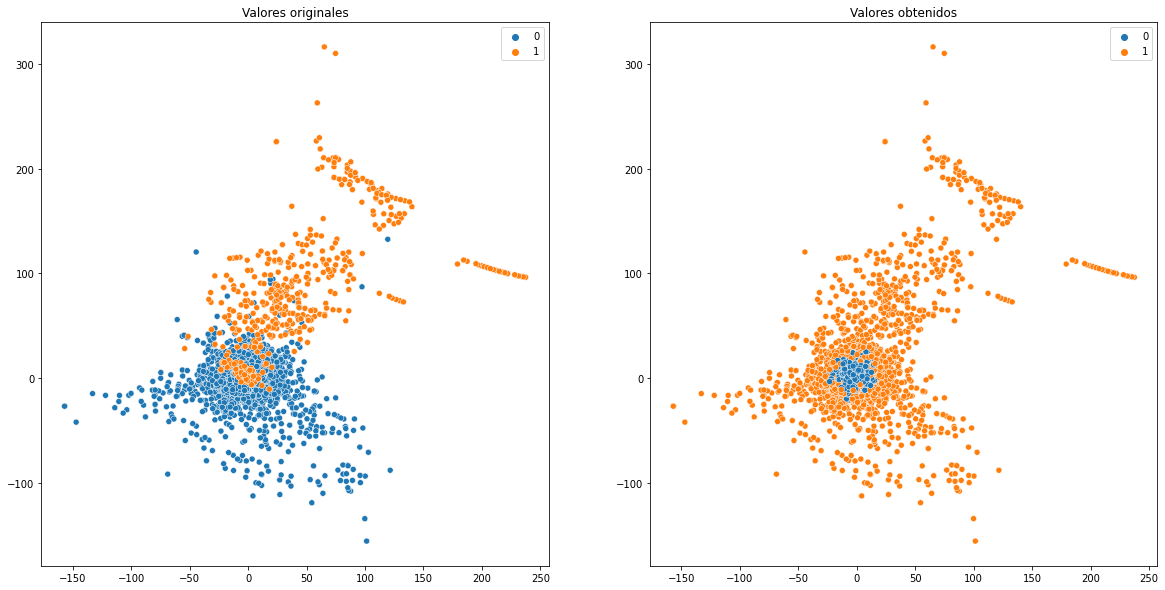

15
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

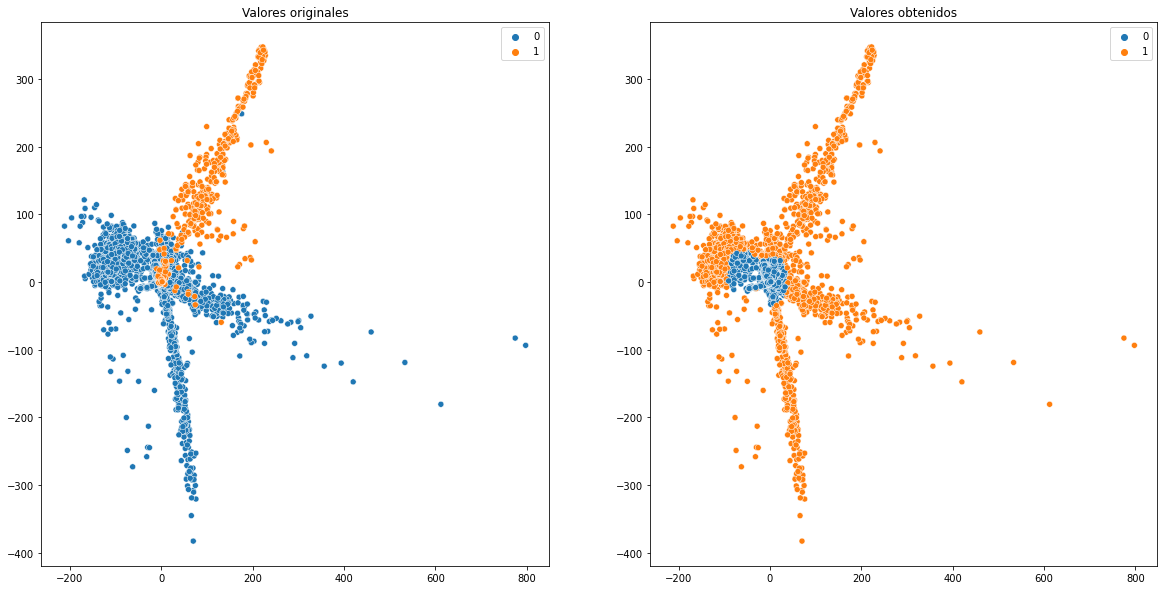

16
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non

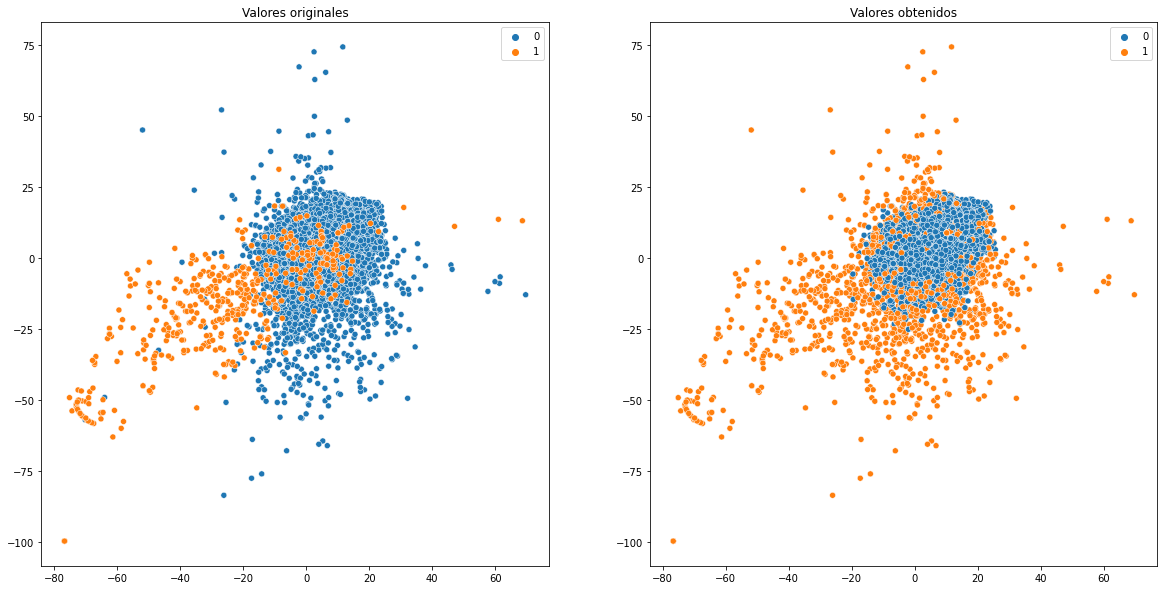

17
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

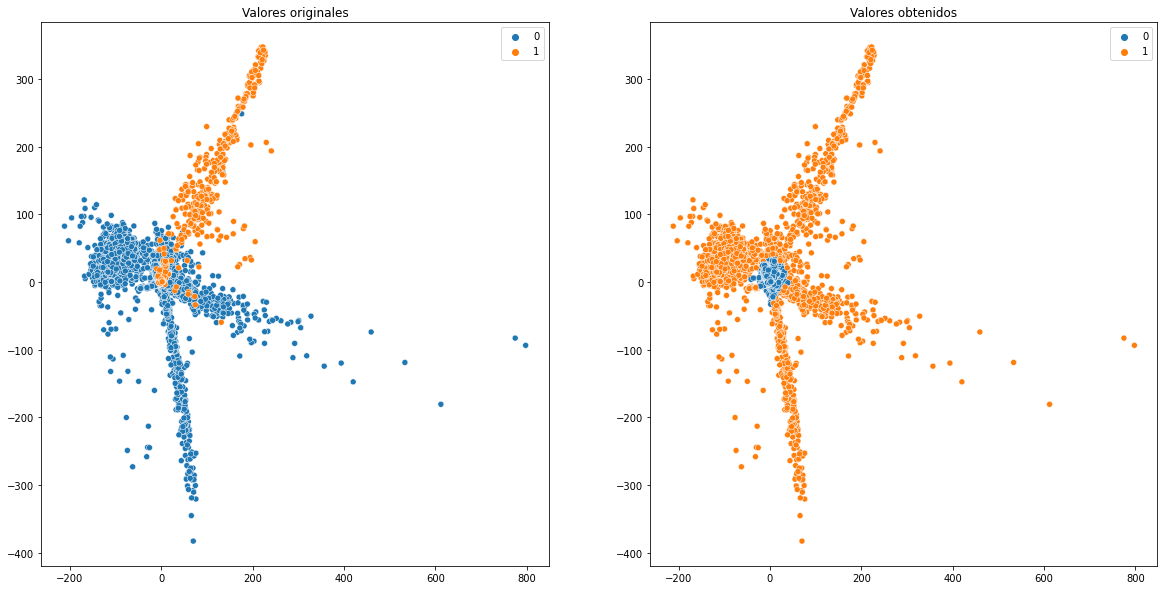

18
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               15872     
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_37 (Dense)            (None, 128)               640       
                                                                 
 dense_38 (Dense)            (None, 512)               66048     
                                                                 
 dense_39 (Dense)            (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non

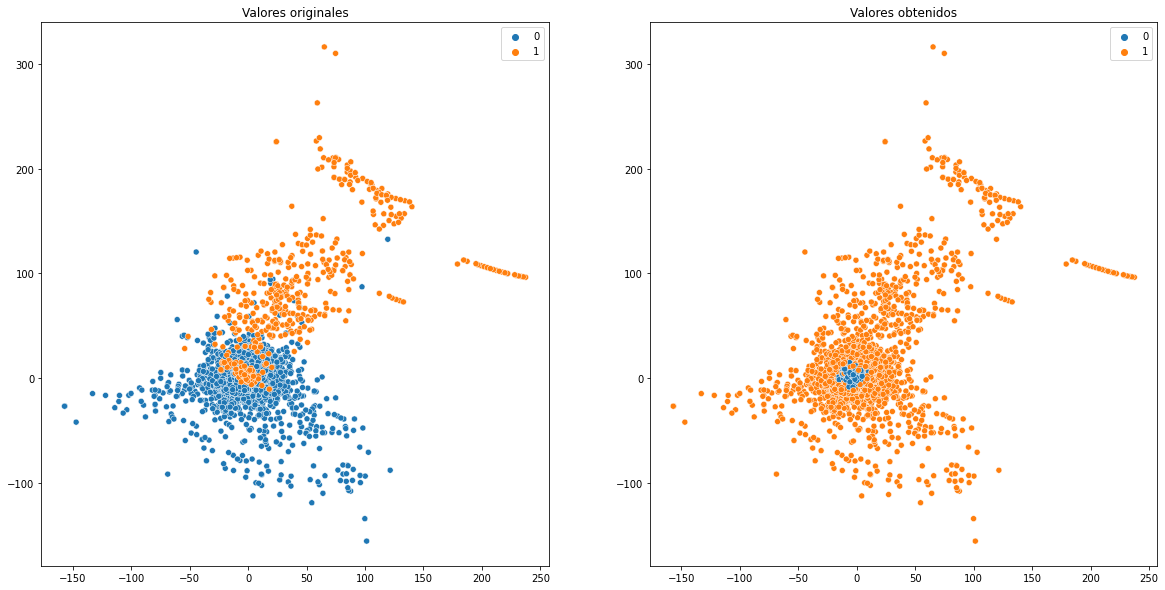

19
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               15872     
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 8)                 1032      
                                                                 
 dense_42 (Dense)            (None, 128)               1152      
                                                                 
 dense_43 (Dense)            (None, 512)               66048     
                                                                 
 dense_44 (Dense)            (None, 30)                15390     
                                                                 
Total params: 165,158
Trainable params: 165,158
Non

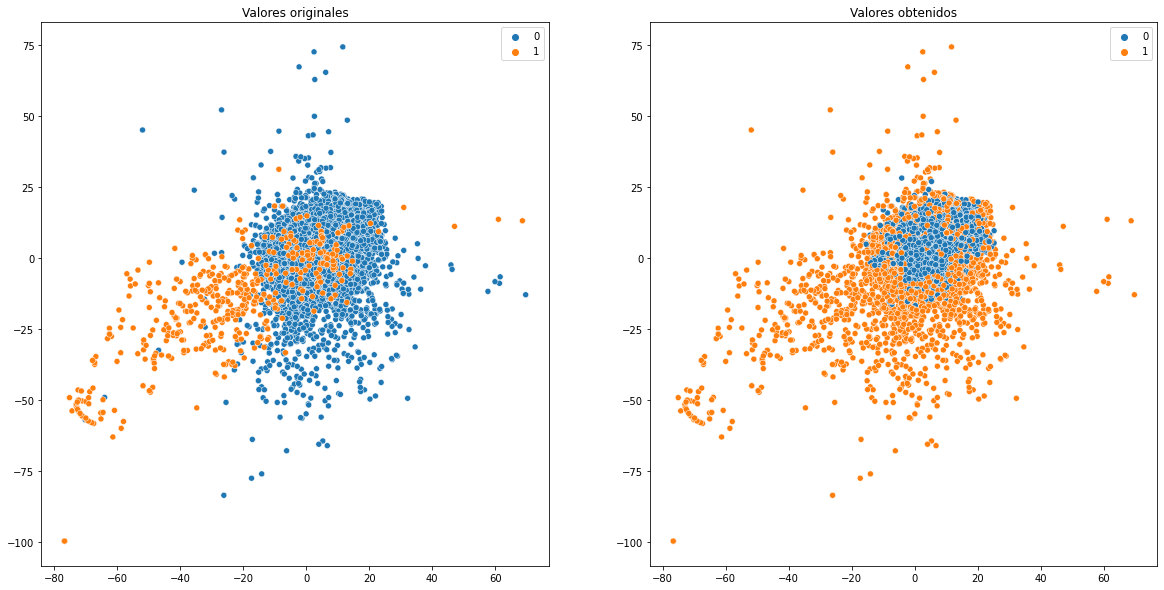

20
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               15872     
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_32 (Dense)            (None, 128)               384       
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 30)                15390     
                                                                 
Total params: 163,616
Trainable params: 163,616
Non

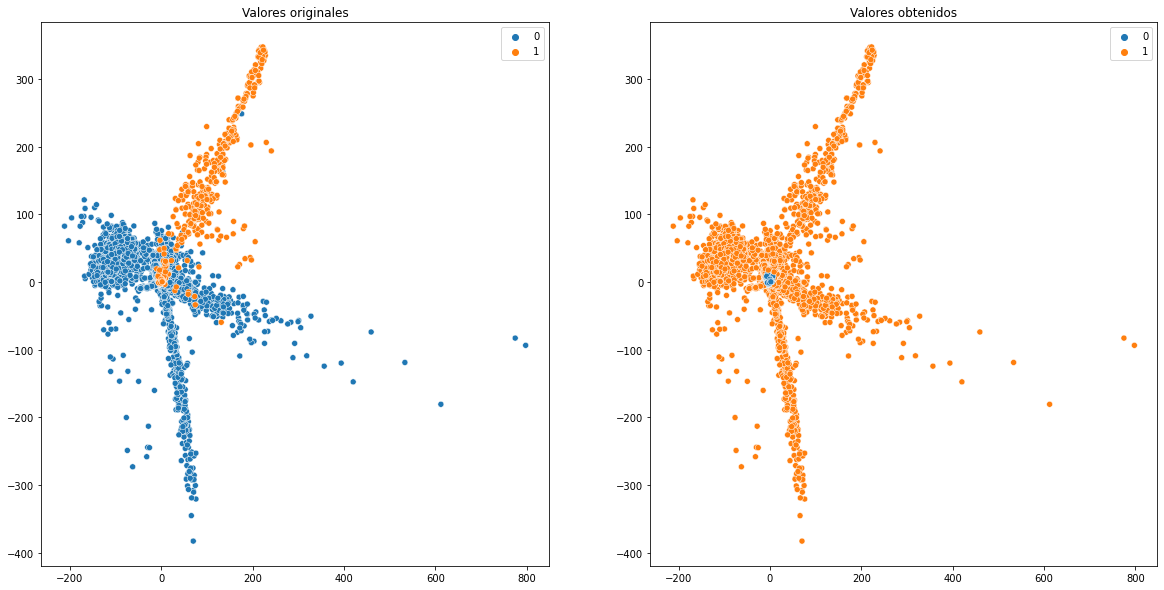

In [36]:
new = []
for n in range(0, len(obj)):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred,dim=2, engine='seaborn')

In [37]:
bueno = obj[0]

In [38]:
x_n, y_n = bueno.predictXY()

In [39]:
plt.probPlot(x_n,y_n)

In [ ]:
parrafo = ''
for o in obj:
    fila=''
    if o.precision() > 0.7:
        
        if o.recall() > 0.6:
            
            fila+=''+str(x.shape[0])+';'
            if o.reduccion.reductionN == 'pca':
                fila += '{"type":"pca","n_components":'+str(o.reduccion.finalDim)+'};'
                
            elif o.reduccion.reductionN == 'encoder':
                fila += '{"type":"encoder","capas":'+str(o.reduccion.capas)+',"finalDim":'+str(o.reduccion.finalDim)+',"batch_size":'+str(o.reduccion.batch_size)+',"epochs":'+str(o.reduccion.epochs)+'};'
            if o.analisis.modeloN == 'lof':
                fila += '{"type":"lof","n_neighbors":'+str(o.analisis.n_neighbors)+',"contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'isoForest':
                fila += '{"type":"isoForest","contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'som':
                fila += '{"type":"som","sigma":'+str(o.analisis.sigma)+',"learning_rate":'+str(o.analisis.learning_rate)+',"neighborhood_function":'+o.analisis.neighborhood_function+',"outliers_percentage":'+str(o.analisis.outliers_percentage)+',"epochs":'+str(o.analisis.epochs)+'};'
            elif o.analisis.modeloN == 'dbscan':
                fila += '{"type":"som","eps":'+str(o.analisis.eps)+',"min_samples":'+str(o.analisis.min_samples)+'};'
            fila += f'{o.precision()};{o.recall()}'
        else:
            continue
    else:
        break
            
    parrafo += fila
    parrafo += '\n'
        

print(parrafo)

In [ ]:
with open("modelos.csv","a") as f:
    
    f.write(parrafo)

In [ ]:
import pandas as pd

mod = pd.read_csv("modelos.csv",sep=";")
mod.head()

mod.iloc[2,:].reduccion

In [ ]:
pd.